#Sesión 5
# Distribuciones de probabilidad

## Histograma

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/My Drive/eolica_notebooks/M02_201912.txt", sep=" ", usecols=[0,1,2,3,4,5, 13], skiprows=[0,1,2], header=None, parse_dates=[[0,1,2,3,4]])
data.columns=["Date","Vel_80", "Vel_60"]
data.set_index("Date", inplace=True)
data.index = pd.to_datetime(data.index, format="%Y %m %d %H %M")
data.head()

,Vel_80,Vel_60
Date,,
2019-12-01 00:00:00,6.9167,5.3128
2019-12-01 00:10:00,5.6143,4.1181
2019-12-01 00:20:00,5.2918,4.0479
2019-12-01 00:30:00,6.1105,4.7368
2019-12-01 00:40:00,6.3958,4.8008


(array([0.00831186, 0.02562824, 0.05922202, 0.0703045 , 0.10008867,
        0.16346662, 0.20848921, 0.22372762, 0.22130333, 0.19532876,
        0.120522  , 0.05783671, 0.02978417, 0.01766271, 0.01142881,
        0.01281412, 0.00935084, 0.00727288, 0.00277062, 0.00103898]),
 array([ 0.21734 ,  0.864023,  1.510706,  2.157389,  2.804072,  3.450755,
         4.097438,  4.744121,  5.390804,  6.037487,  6.68417 ,  7.330853,
         7.977536,  8.624219,  9.270902,  9.917585, 10.564268, 11.210951,
        11.857634, 12.504317, 13.151   ]),
 <a list of 20 Patch objects>)

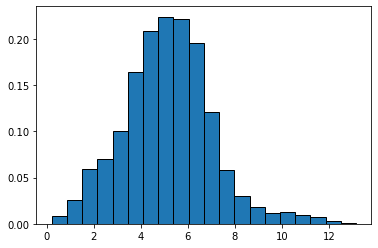

In [17]:
#plt.hist(data["Vel_60"])
plt.hist(data.Vel_60, density=True, ec="k", bins=20, cumulative=False) #k es negro 

## Ajuste de una función de distribución de probabilidad

### Función Normal: Método 1

$$p(u) = \frac{1}{\sigma_u\sqrt{2\pi}}\text{exp}\big[-\frac{(u-U)^2}{2\sigma^2_u}\big]$$

In [18]:
desv = data.Vel_60.std()
prom = data.Vel_60.mean()

In [19]:
print(desv, prom)

1.8985256547599454 5.153837393057105


In [22]:
def normal(x, desv, prom):
  return((1/(desv*np.sqrt(2*np.pi)))*np.exp(-((x-prom)**2/(2*desv**2))))

In [24]:
normal(10, desv, prom)

0.008083900955230821

In [27]:
#plt.plot(data.Vel_60)

In [28]:
#plt.plot(normal(data.Vel_60,desv, prom))

In [33]:
x = np.linspace(data.Vel_60.min(), data.Vel_60.max(), 1000)

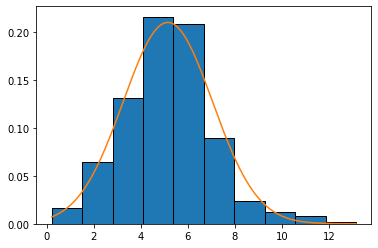

In [37]:
plt.hist(data.Vel_60, density=True, ec="k")
plt.plot(x, normal(x, desv, prom))

## Weibull 
 $$p(U)=\bigg(\frac{k}{c}\bigg)\bigg(\frac{U}{c}\bigg)^{k-1}\text{exp}\bigg[\bigg(-\frac{U}{c}\bigg)^k\bigg]$$

### Función Normal: Método 2

In [38]:
from scipy import stats 

In [40]:
prom, desv = stats.norm.fit(data.Vel_60)

In [42]:
p = stats.norm.pdf(x, prom, desv) #probability density function (pdf)

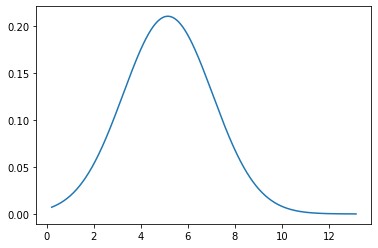

In [43]:
plt.plot(x, p)

In [44]:
c = stats.norm.cdf(x, prom, desv) #cumulative density function (pdf)

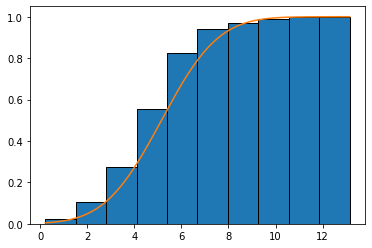

In [47]:
plt.hist(data.Vel_60, density=True, cumulative=True, ec="k")
plt.plot(x, c)

## Weibull: Método 2

In [81]:
par_weibull = stats.weibull_min.fit(data.Vel_60,) #forma, locacion, escala

In [49]:
par_weibull

(2.8946732259209997, -0.022536713188134192, 5.791256552703618)

In [54]:
0# c, k, loc = stats.weibull_min.fit(data.Vel_60)

In [69]:
pw = stats.weibull_min.pdf(x, par_weibull[0], par_weibull[1], par_weibull[2])

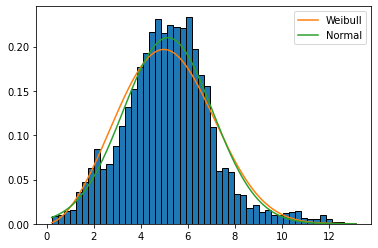

In [64]:
plt.hist(data.Vel_60, density=True, bins=50, ec='k')
plt.plot(x, pw, label="Weibull")
plt.plot(x, p, label="Normal")
plt.legend()

In [71]:
pw_1 = stats.weibull_min.pdf(x, 1, par_weibull[1], par_weibull[2])
pw_2 = stats.weibull_min.pdf(x, 2, par_weibull[1], par_weibull[2])
pw_3 = stats.weibull_min.pdf(x, 3, par_weibull[1], par_weibull[2])

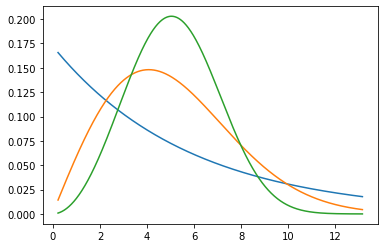

In [73]:
plt.plot(x, pw_1)
plt.plot(x, pw_2)
plt.plot(x, pw_3)

In [80]:
pw_1 = stats.weibull_min.pdf(x, par_weibull[0], 0, 1)
pw_2 = stats.weibull_min.pdf(x, par_weibull[0], 0, 2)
pw_3 = stats.weibull_min.pdf(x, par_weibull[0], floc=0, 3)

SyntaxError: ignored

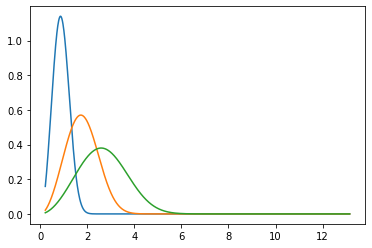

In [79]:
plt.plot(x, pw_1)
plt.plot(x, pw_2)
plt.plot(x, pw_3)